In [1]:
from matplotlib import pyplot as plt
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
import xarray as xr
import sys
import numpy

url = r'DataSet\nc_20190115-NAVO-L4HR1m-GLOB-v01-fv01_0-K10_SST.nc.bz2.nc4'

nc = netCDF4.Dataset(url)

print(nc.variables.keys())

odict_keys(['lat', 'lon', 'time', 'analysed_sst', 'analysis_error', 'mask'])


In [34]:
temp = nc.variables['analysed_sst']
print(temp)

<class 'netCDF4._netCDF4.Variable'>
int16 analysed_sst(time, lat, lon)
    long_name: Analyzed Sea Surface Temperature
    standard_name: sea_surface_temperature
    type: depth 1m
    units: kelvin
    _FillValue: -32768
    add_offset: 273.15
    scale_factor: 0.1
    valid_min: -20
    valid_max: 350
unlimited dimensions: 
current shape = (1, 1801, 3600)
filling on


In [5]:
for d in nc.dimensions.items():
    print(d)

('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 1801
)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 3600
)
('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1
)


In [6]:
temp.dimensions

('time', 'lat', 'lon')

In [7]:
temp.shape

(1, 1801, 3600)

In [35]:
# numpy.set_printoptions(threshold=sys.maxsize)
lats, lons, temps = nc.variables['lat'][:], nc.variables['lon'][:], nc.variables['analysed_sst'][:]
# print("Lats")
# pprint(lats)
# print("Lons")
# pprint(lons)
# print("Temps")
# pprint (temps[:])

for lat, lon, temp in zip(lats, lons, temps):
    print (f"Lat:{lat} Lon:{lon} Temp:{temp}\n")

Lat:90.0 Lon:-180.0 Temp:[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]



In [36]:
latvals = lat[:]; lonvals = lon[:] 
# a function to find the index of the point closest pt
# (in squared distance) to give lat/lon value.
def getclosest_ij(lats,lons,latpt,lonpt):
 # find squared distance of every point on grid
 dist_sq = (lats-latpt)**2 + (lons-lonpt)**2 
 # 1D index of minimum dist_sq element
 minindex_flattened = dist_sq.argmin()
 # Get 2D index for latvals and lonvals arrays from 1D index
 return np.unravel_index(minindex_flattened, lats.shape)

iy_min, ix_min = getclosest_ij(latvals, lonvals, 50., 140)
print(iy_min)
print(ix_min)

IndexError: invalid index to scalar variable.

In [3]:
ds = xr.open_dataset(url)

In [9]:
print(ds.values)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:         (lat: 1801, lon: 3600, time: 1)
Coordinates:
  * lat             (lat) float32 90.0 89.9 89.8 89.700005 ... -89.8 -89.9 -90.0
  * lon             (lon) float32 -180.0 -179.90001 -179.8 ... 179.8 179.90001
  * time            (time) object 2019-01-16 00:00:00
Data variables:
    analysed_sst    (time, lat, lon) float32 ...
    analysis_error  (time, lat, lon) float32 ...
    mask            (time, lat, lon) int16 ...
Attributes:
    NC_GLOBAL.Conventions:            NAVO_netcdf_v3.4
    NC_GLOBAL.title:                  NAVOCEANO 10km Analyzed Sea Surface Tem...
    NC_GLOBAL.DSD_entry_id:           NAVO-L4HR1m-GLOB-K10_SST
    NC_GLOBAL.reference:              https://oceanography.navy.mil/legacy/web
    NC_GLOBAL.institution:            Naval Oceanographic Office
    NC_GLOBAL.contact:                doug.may@navy.mil
    NC_GLOBAL.GDS_version_id:         v1.0-rev1.7
    NC_GLOBAL.netcdf_version_id:      netcdf v3.4


In [10]:
print(ds.dims)

Frozen(SortedKeysDict({'lat': 1801, 'lon': 3600, 'time': 1}))


In [11]:
print(ds.coords)

Coordinates:
  * lat      (lat) float32 90.0 89.9 89.8 89.700005 ... -89.8 -89.9 -90.0
  * lon      (lon) float32 -180.0 -179.90001 -179.8 ... 179.7 179.8 179.90001
  * time     (time) object 2019-01-16 00:00:00


In [12]:
print(ds.var)

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:         (lat: 1801, lon: 3600, time: 1)
Coordinates:
  * lat             (lat) float32 90.0 89.9 89.8 89.700005 ... -89.8 -89.9 -90.0
  * lon             (lon) float32 -180.0 -179.90001 -179.8 ... 179.8 179.90001
  * time            (time) object 2019-01-16 00:00:00
Data variables:
    analysed_sst    (time, lat, lon) float32 ...
    analysis_error  (time, lat, lon) float32 ...
    mask            (time, lat, lon) int16 ...
Attributes:
    NC_GLOBAL.Conventions:            NAVO_netcdf_v3.4
    NC_GLOBAL.title:                  NAVOCEANO 10km Analyzed Sea Surface Tem...
    NC_GLOBAL.DSD_entry_id:           NAVO-L4HR1m-GLOB-K10_SST
    NC_GLOBAL.reference:              https://oceanography.navy.mil/legacy/web
    NC_GLOBAL.institution:            Naval Oceanographic Office
    NC_GLOBAL.contact:                doug.may@navy.mil
    NC_GLOBAL.GDS_version_id:         v1.0-rev1.7
    

In [24]:
print(ds.analysed_sst)

<xarray.DataArray 'analysed_sst' (time: 1, lat: 1801, lon: 3600)>
[6483600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 89.9 89.8 89.700005 ... -89.8 -89.9 -90.0
  * lon      (lon) float32 -180.0 -179.90001 -179.8 ... 179.7 179.8 179.90001
  * time     (time) object 2019-01-16 00:00:00
Attributes:
    long_name:      Analyzed Sea Surface Temperature
    standard_name:  sea_surface_temperature
    type:           depth 1m
    units:          kelvin
    valid_min:      -20
    valid_max:      350


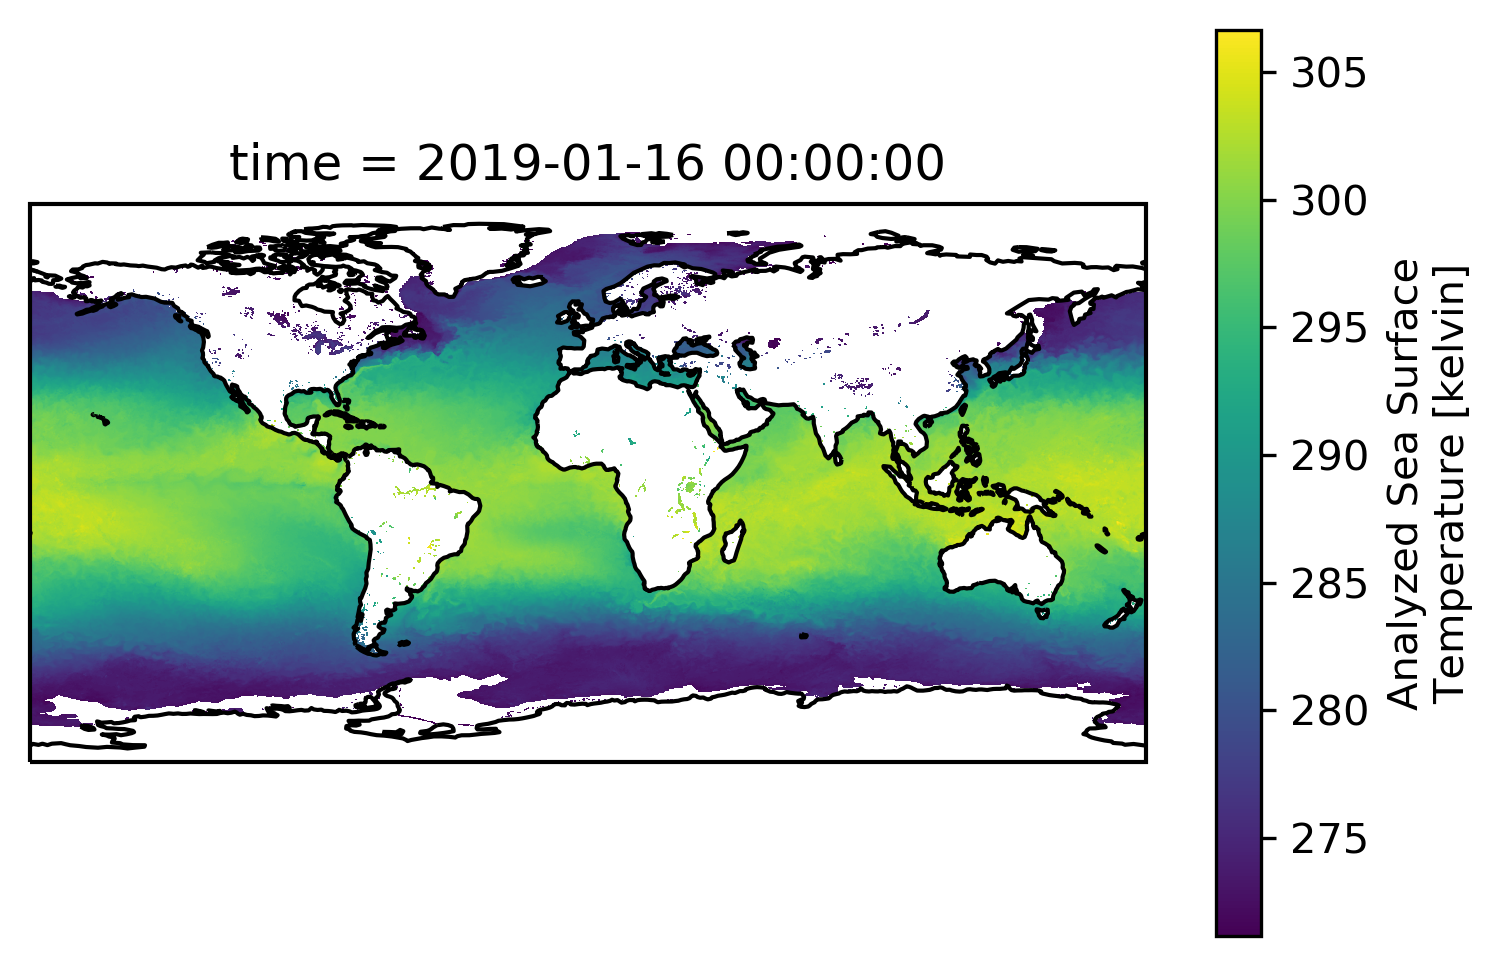

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

da = ds.analysed_sst

# Draw coastlines of the Earth
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
da.plot()
plt.rcParams['figure.dpi'] = 300
# plt.savefig('earth_sst_map_plot.pdf', dpi=300)
# plt.savefig('earth_sst_map_plot_kelvin.png', dpi=1200)
# plt.savefig('earth_sst_map_plot_nodpi.pdf')
# plt.savefig('earth_sst_map_plot_nodpi.png')
plt.show()

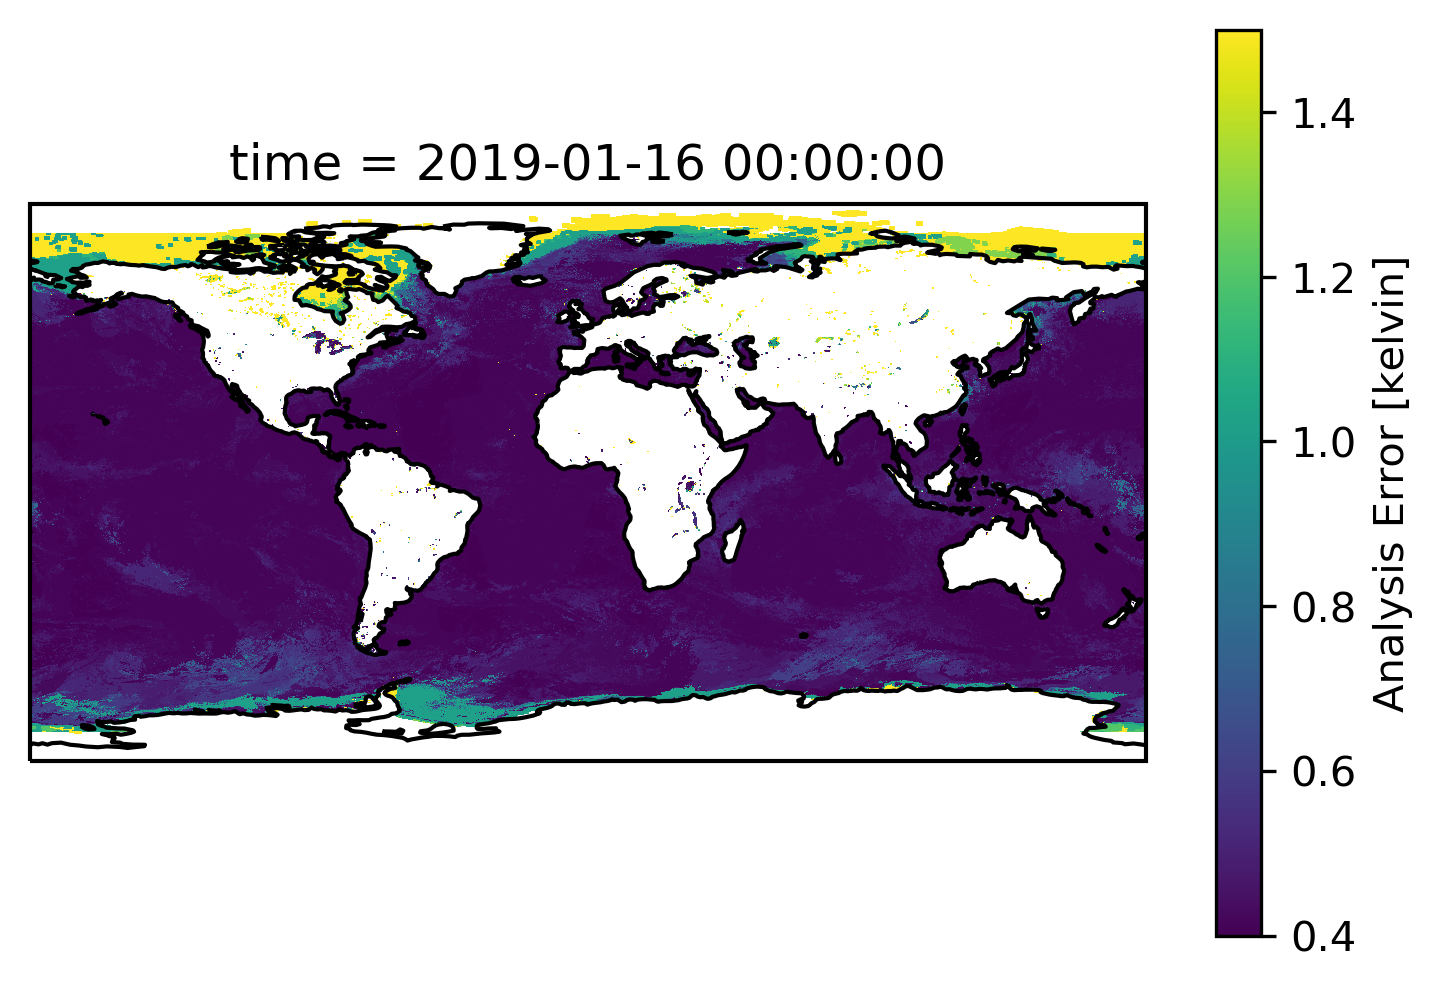

In [31]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

da = ds.analysis_error

# Draw coastlines of the Earth
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
da.plot()
plt.rcParams['figure.dpi'] = 300
plt.show()

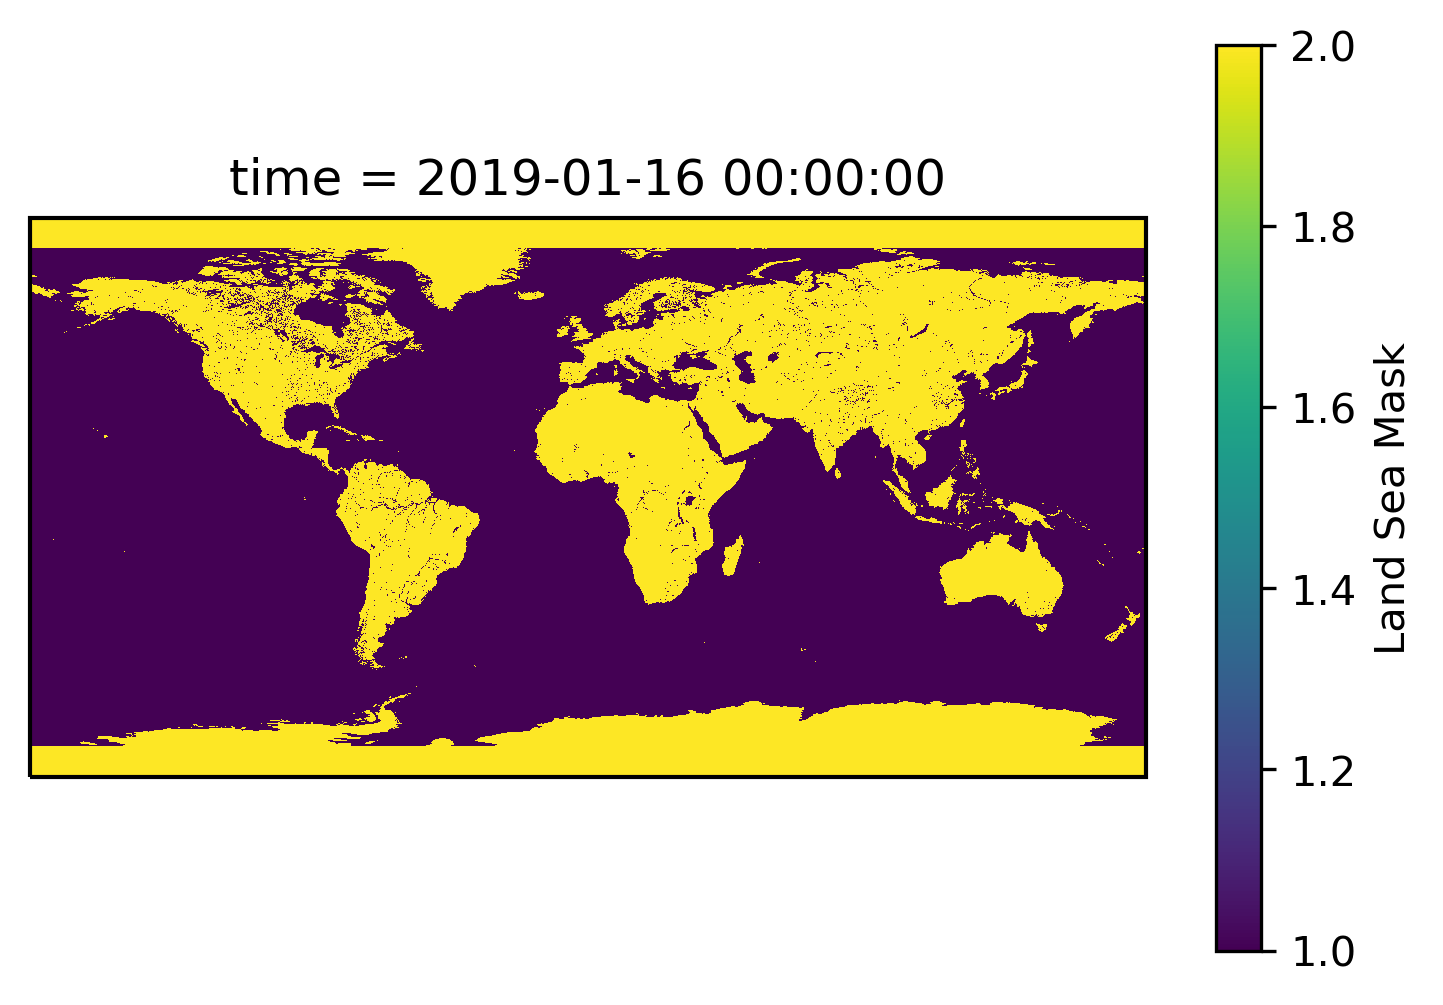

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

da = ds.mask

# Draw coastlines of the Earth
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.coastlines()
da.plot()
plt.rcParams['figure.dpi'] = 300
plt.savefig('earth_sst_map_plot_no_coastline.png', dpi=4800)
plt.show()